**STAT 557: DATA MINING - I**

---
**Assignment - 2**


Author: Aadya Sanwal [AFS6594@PSU.EDU] and Denesh Kumar [DZM5964@PSU.EDU]


--------------------------------------------------------------------------

In [ ]:
# Libraries 

In [1]:
import time
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import roc_curve, auc\

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [43]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Import Credit Card Data 

In [4]:
data_credit_card = pd.read_csv("UCI_Credit_Card.csv")

In [5]:
data_credit_card.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# Dimension of the dataset, we have 24 Features and 30000 data points 

In [6]:
data_credit_card.shape

(30000, 25)

In [24]:
# Check for Null or missing values in dataset, and we do not have any Null points 

In [7]:
data_credit_card.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
# Splitting Feature and the Prediction variable from dataset as x and y respectively 

In [8]:
x = data_credit_card.drop('default.payment.next.month', axis=1)
y = data_credit_card['default.payment.next.month']

# Splitting data for Training and Testing

In [ ]:
#By default the data gets split into 75-25 rule 

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Standardization the Features

In [ ]:
# The values of some feature are in higher value range and some are in lower value range, so the classification model can assume the feature with higher value is 
# more important and assign more weight to that feature, so we perform standardization to bring all feature to same level 

In [10]:
model_standardization=StandardScaler()
model_standardization.fit(x_train)
x_train=model_standardization.transform(x_train)
x_test=model_standardization.transform(x_test)


# Feature Selection by Lasso Regression

In [ ]:
# Performing Gridsearch to find the best value of alpha 

In [11]:
lasso_model=Lasso()
param=np.logspace(-4, 4, 40)
parameters={'alpha':param}
lasso_classifier=GridSearchCV(lasso_model,parameters,cv=5)
lasso_classifier.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.07029063e-01, 4.92388263e-01, 7.89652287e-01,
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04])})

In [12]:
print(lasso_classifier.best_params_)

{'alpha': 0.0010608183551394483}


In [13]:
best_model_lasso=Lasso(alpha=lasso_classifier.best_params_['alpha'])
best_model_lasso.fit(x_train,y_train)
best_model_lasso.coef_

array([ 0.0018086 , -0.01104617, -0.00661549, -0.01119182, -0.01305585,
        0.01158739,  0.11085342,  0.02332597,  0.01093396,  0.00693269,
        0.00154871,  0.00355527, -0.03873658, -0.        ,  0.        ,
        0.        ,  0.        ,  0.00468047, -0.00780881, -0.0052562 ,
       -0.00146495, -0.00321763, -0.00251509, -0.00267241])

In [14]:
name = data_credit_card.columns

In [ ]:
# This plot is to visualize how the weights of each feature varies, the features with zero weights can be removed as they are not significant for prediction 

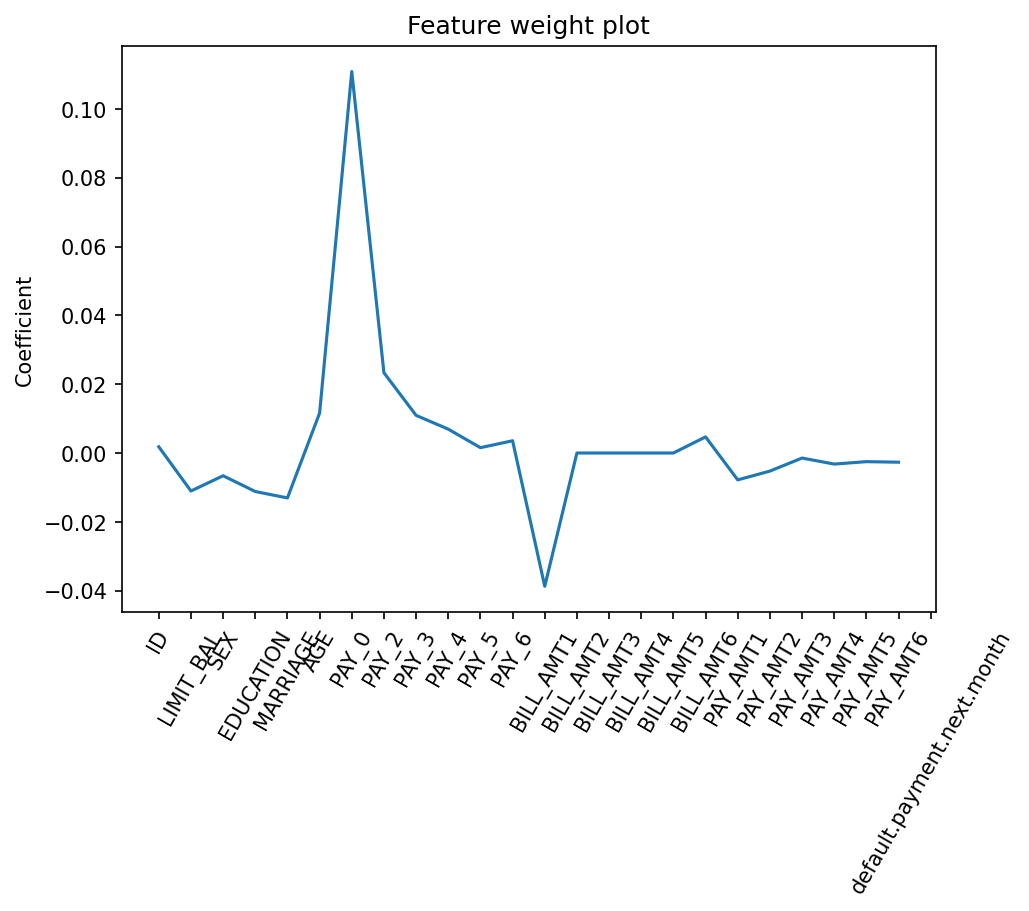

In [15]:
plt.figure(figsize=(7,5),dpi=150)
plt.title("Feature weight plot")
plt.plot(best_model_lasso.coef_)
_=plt.xticks(range(len(name)),name,rotation=60)
_=plt.ylabel("Coefficient")

In [16]:
coeffi = best_model_lasso.coef_!=0
non_significant=[]
for i in range(len(data_credit_card.columns)-1):
  if coeffi[i]==False:
    non_significant.append(data_credit_card.columns[i])

In [ ]:
# These are the fesatures that is currently being removed 

In [17]:
non_significant

['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5']

In [ ]:
# Removing features with zero weights as they are not significant for our prediction 

In [18]:
x_train=x_train[:,best_model_lasso.coef_!=0]
x_test=x_test[:,best_model_lasso.coef_!=0]

In [ ]:
# The feature has been reduced and this is the new dimention of out dataset 

In [19]:
x_train.shape

(22500, 20)

# Logistic Regression

In [ ]:
# Performing Gridserach for the best value of Regularization strength and Penalty 

In [20]:
start0=time.time()
logisticRegression_model=LogisticRegression()
parameters = {'C':np.logspace(-3, 3, 40),'penalty':['l1', 'l2', 'elasticnet']}
logistic_regression= GridSearchCV(logisticRegression_model, parameters, cv=5, scoring='accuracy')
logistic_regression.fit(x_train,y_train)
end0=time.time()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
400 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

In [21]:
print(f"Time taken gradient search for logistic regression {end0-start0} seconds")

Time taken gradient search for logistic regression 16.099446296691895 seconds


In [ ]:
# The identified best parameters from gradient search 

In [22]:
print(logistic_regression.best_params_)
print(logistic_regression.best_score_)

{'C': 0.8376776400682924, 'penalty': 'l2'}
0.8125333333333333


In [ ]:
# Thus found the best parameters, we are using this for our final logistic regression model 

In [23]:
start1=time.time()
c_best=logistic_regression.best_params_['C']
penalty_best=logistic_regression.best_params_['penalty']
logistic_regression_best_model=LogisticRegression(C=c_best,penalty=penalty_best)
logistic_regression_best_model.fit(x_train, y_train)
pred_y_train = logistic_regression_best_model.predict_proba(x_train)[:,1]
pred_y_test = logistic_regression_best_model.predict_proba(x_test)[:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, pred_y_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, pred_y_test)
end1=time.time()

In [24]:
print(f"Time taken be logistic regression to run is {end1-start1} seconds")

Time taken be logistic regression to run is 0.10984396934509277 seconds


# ROC Plot

In [25]:
tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train, pred_y_train)
te_fpr, te_tpr, te_thresholds = roc_curve(y_test, pred_y_test)

In [47]:
tr_fpr

array([0.00000000e+00, 0.00000000e+00, 5.70939195e-05, ...,
       9.98686840e-01, 9.98686840e-01, 1.00000000e+00])

In [48]:
tr_tpr

array([0.00000000e+00, 2.00601805e-04, 2.00601805e-04, ...,
       9.99799398e-01, 1.00000000e+00, 1.00000000e+00])

In [49]:
tr_thresholds

array([1.99444827e+00, 9.94448268e-01, 9.93574725e-01, ...,
       1.94050770e-03, 1.91816611e-03, 1.92977456e-14])

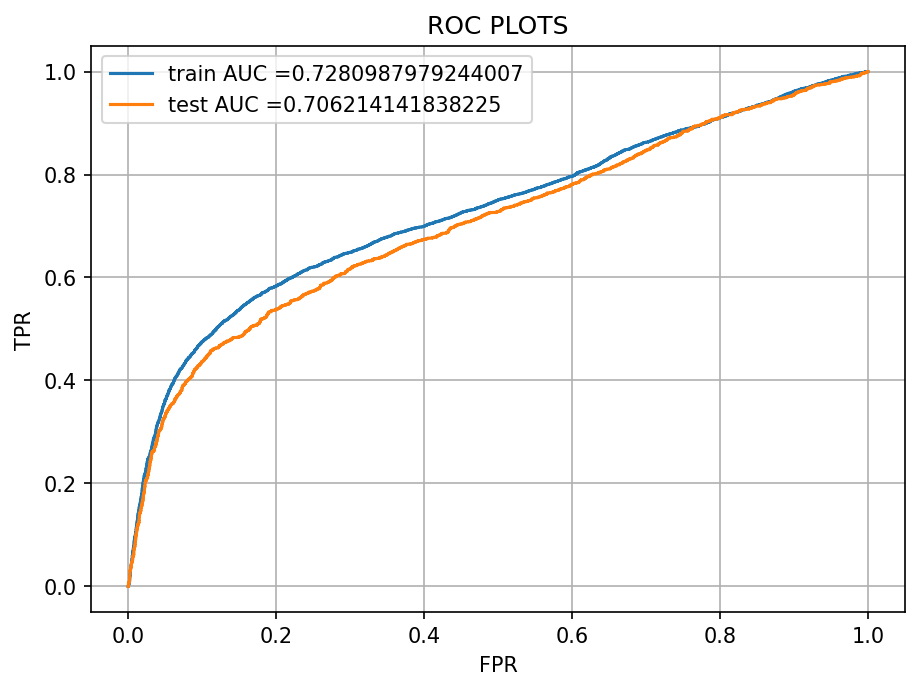

In [26]:
plt.figure(figsize=(7,5),dpi=150)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(tr_fpr, tr_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(te_fpr, te_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

# Confusion Matrix::

Confusion matrix


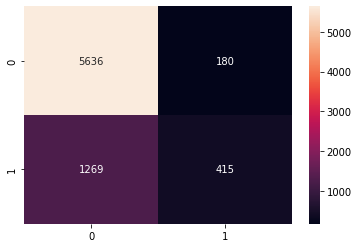

In [27]:
print("Confusion matrix")
sns.heatmap(confusion_matrix(y_test, logistic_regression_best_model.predict(x_test)),annot=True,fmt='d')

In [28]:
accuracy_logisticRegression=accuracy_score(y_test, logistic_regression_best_model.predict(x_test))
error_logisticRegression  = 1 - accuracy_logisticRegression
precision_logisticRegression = precision_score(y_test, logistic_regression_best_model.predict(x_test), average='binary')
f1_logisticRegression=f1_score(y_test, logistic_regression_best_model.predict(x_test))
print(f"Accuracy of logistic regression for this dataset is {accuracy_logisticRegression}")
print(f"Error of logistic regression for this dataset is {error_logisticRegression}")
print(f"Precision score of logistic regression for this dataset is {precision_logisticRegression}")
print(f"F1 score of logistic regression for this dataset is {f1_logisticRegression}")

Accuracy of logistic regression for this dataset is 0.8068
Error of logistic regression for this dataset is 0.19320000000000004
Precision score of logistic regression for this dataset is 0.6974789915966386
F1 score of logistic regression for this dataset is 0.3641948222904783


# Random Forest 

In [29]:
parameters = { 'bootstrap': [True],
    'n_estimators': [200],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [5,15],
    'criterion' :['gini', 'entropy']
}

In [30]:
start2=time.time()
random_forest=RandomForestClassifier()
Random_Forest_Classifier_model= GridSearchCV(random_forest, parameters, cv=5, scoring='accuracy',return_train_score=True,n_jobs=-1)
Random_Forest_Classifier_model.fit(x_train,y_train)
end2=time.time()

In [31]:
print(f"Time taken for gradient search Random Forest Classifier to run is {end2-start2} seconds")

Time taken for gradient search Random Forest Classifier to run is 242.81718039512634 seconds


In [32]:
print(Random_Forest_Classifier_model.best_params_)
print(Random_Forest_Classifier_model.best_score_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 200}
0.8222666666666667


In [33]:
start3=time.time()
best_n_estimators=Random_Forest_Classifier_model.best_params_['n_estimators']
best_max_features=Random_Forest_Classifier_model.best_params_['max_features']
best_max_depth=Random_Forest_Classifier_model.best_params_['max_depth']
best_criterion=Random_Forest_Classifier_model.best_params_['criterion']
best_RandomForestClassifier_model=RandomForestClassifier(n_estimators=best_n_estimators,max_features=best_max_features,max_depth=best_max_depth,criterion=best_criterion)
best_RandomForestClassifier_model.fit(x_train, y_train)
end3=time.time()





In [34]:
print(f"Time taken be Random Forest Classifier to run is {end3-start3} seconds")

Time taken be Random Forest Classifier to run is 14.232236623764038 seconds


In [35]:
pred_y_train = best_RandomForestClassifier_model.predict_proba(x_train)[:,1]
pred_y_test = best_RandomForestClassifier_model.predict_proba(x_test)[:,1]


In [36]:
tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train, pred_y_train)
te_fpr, te_tpr, te_thresholds = roc_curve(y_test, pred_y_test)

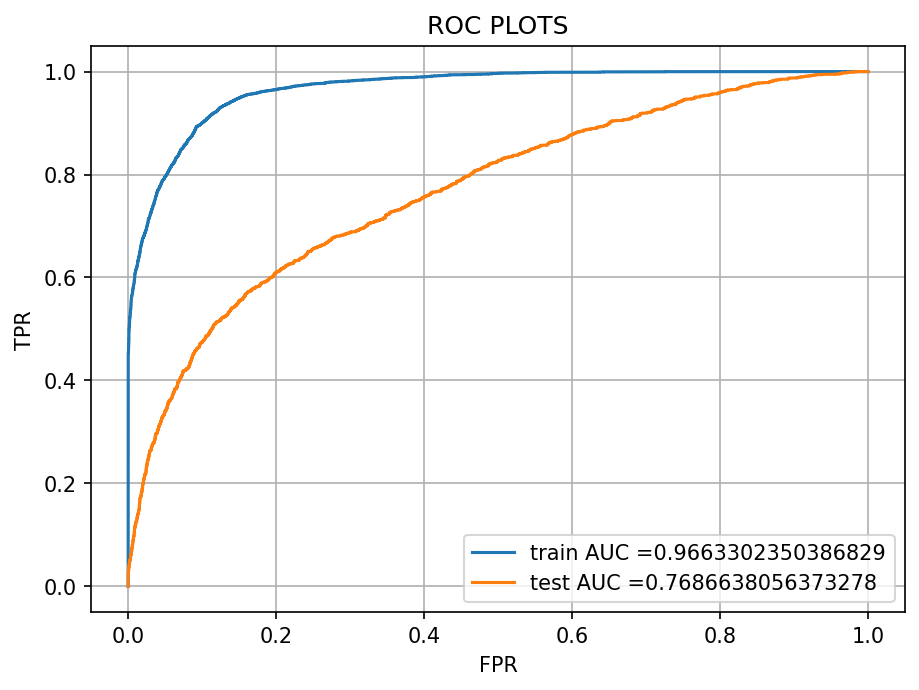

In [37]:
plt.figure(figsize=(7,5),dpi=150)
plt.plot(tr_fpr, tr_tpr, label="train AUC ="+str(auc(tr_fpr, tr_tpr)))
plt.plot(te_fpr, te_tpr, label="test AUC ="+str(auc(te_fpr, te_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

confusion matrix


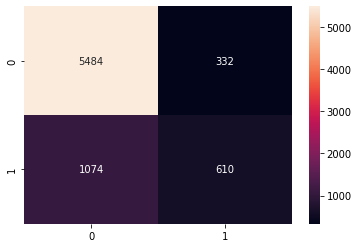

In [38]:
print("confusion matrix")
sns.heatmap(confusion_matrix(y_test, best_RandomForestClassifier_model.predict(x_test)),annot=True,fmt='d')

In [39]:
accuracy_randomforest_model=accuracy_score(y_test, best_RandomForestClassifier_model.predict(x_test))
error_randomforest_model = 1 - accuracy_randomforest_model
precision_randomforest_model = precision_score(y_test, best_RandomForestClassifier_model.predict(x_test), average='binary')
f1_randomforest_model=f1_score(y_test, best_RandomForestClassifier_model.predict(x_test))
print(f"Accuracy of Random Forest Classifier for this dataset is {accuracy_randomforest_model}")
print(f"Error of Random Forest Classifier for this dataset is {error_randomforest_model}")
print(f"precision of Random Forest Classifier for this dataset is {precision_randomforest_model}")
print(f"F1 score of Random Forest Classifier for this dataset is {f1_randomforest_model}")

Accuracy of Random Forest Classifier for this dataset is 0.8125333333333333
Error of Random Forest Classifier for this dataset is 0.18746666666666667
precision of Random Forest Classifier for this dataset is 0.6475583864118896
F1 score of Random Forest Classifier for this dataset is 0.4645849200304645


# SVM

In [40]:
start4=time.time()
parameters = {'C':[10], 'gamma':np.logspace(-6, -1, 3)}
svm = svm.SVC()
svm_model = GridSearchCV(svm, parameters, cv=5, scoring='accuracy',return_train_score=True,n_jobs=-1)
svm_model.fit(x_train,y_train)
svm_model.best_estimator_
end4=time.time()

In [41]:
print(f"Time taken for gradient search SVM Classifier to run is {end4-start4} seconds")

Time taken for gradient search SVM Classifier to run is 184.27317833900452 seconds


In [44]:
start5=time.time()
best_c=svm_model.best_params_['C']
best_gamma=svm_model.best_params_['gamma']
svm_best_model = svm.SVC(C=best_c, random_state=0, gamma=best_gamma)
svm_best_model.fit(x_train, y_train)
end5=time.time()


In [47]:
print(f"Time taken by SVM model to run is {end5-start5} seconds")

Time taken by SVM model to run is 112.41291522979736 seconds


In [46]:
y_train_pred = svm_best_model.predict(x_train)
y_test_pred = svm_best_model.predict(x_test)

In [48]:
tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
te_fpr, te_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

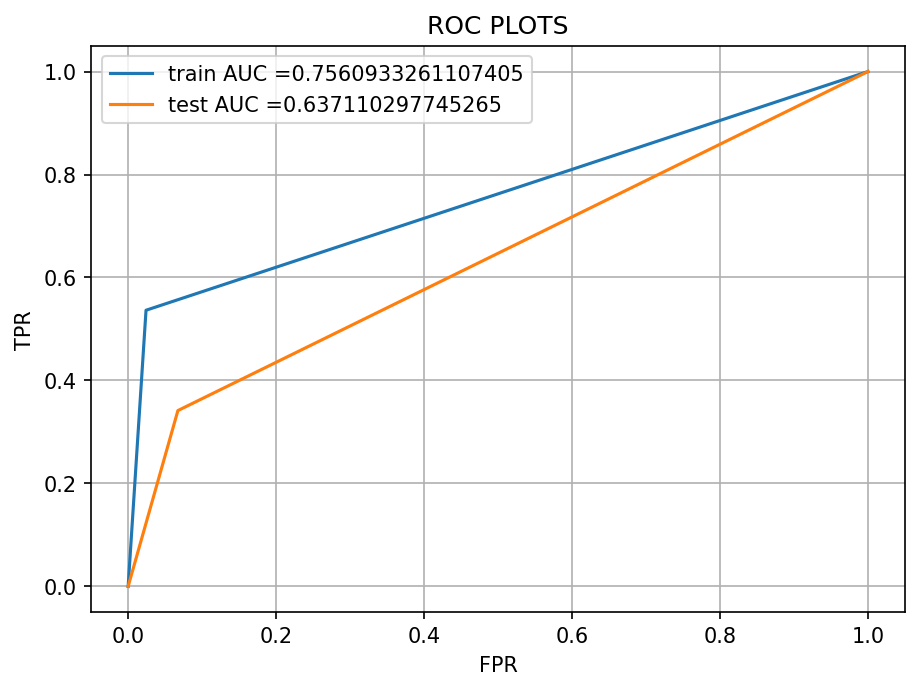

In [54]:
plt.figure(figsize=(7,5),dpi=150)
plt.plot(tr_fpr, tr_tpr, label="train AUC ="+str(auc(tr_fpr, tr_tpr)))
plt.plot(te_fpr, te_tpr, label="test AUC ="+str(auc(te_fpr, te_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

Confusion matrix


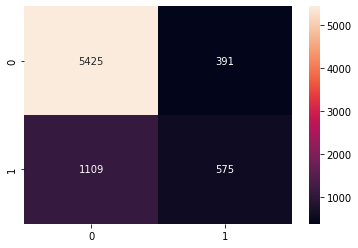

In [52]:
print("Confusion matrix")
sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True,fmt='d')

In [53]:
accuracy_svm=accuracy_score(y_test,y_test_pred)
error_svm = 1 - accuracy_svm
precision_svm_model = precision_score(y_test,svm_best_model.predict(x_test), average='binary')
f1_svm=f1_score(y_test, y_test_pred)
print(f"Accuracy of SVM Classifier for this dataset is {accuracy_svm}")
print(f"Error of SVM Classifier for this dataset is {error_svm}")
print(f"Precision of SVM Classifier for this dataset is {precision_svm_model}")
print(f"F1 score of SVM Classifier for this dataset is {f1_svm}")

Accuracy of SVM Classifier for this dataset is 0.8
Error of SVM Classifier for this dataset is 0.19999999999999996
Precision of SVM Classifier for this dataset is 0.5952380952380952
F1 score of SVM Classifier for this dataset is 0.43396226415094336


# Boosting 

In [ ]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = abc.fit(x_train, y_train)

In [56]:
start6=time.time()
parameters = {'n_estimators':[200], 'learning_rate':[1,2]}
AdaBoosting_model = AdaBoostClassifier()
clf = GridSearchCV(AdaBoosting_model, parameters,cv=5, scoring='accuracy')
clf.fit(x_train,y_train)
clf.best_estimator_
end6=time.time()

In [57]:
print(f"Time taken AdaBoosting gradient search to run is {end6-start6} seconds")

Time taken AdaBoosting gradient search to run is 87.20731019973755 seconds


In [58]:
print(clf.best_params_)
print(clf.best_score_)

{'learning_rate': 1, 'n_estimators': 200}
0.8192


In [59]:
start7=time.time()
best_n_estimators=clf.best_params_['n_estimators']
best_learning_rate=clf.best_params_['learning_rate']
bst = AdaBoostClassifier(base_estimator=None, n_estimators=best_n_estimators, random_state=0, learning_rate=best_learning_rate)
bst.fit(x_train, y_train)
end7=time.time()

In [60]:
print(f"Time taken be Random Forest Classifier to run is {end7-start7} seconds")

Time taken be Random Forest Classifier to run is 8.603944778442383 seconds


In [61]:
y_train_pred = bst.predict(x_train)
y_test_pred = bst.predict(x_test)

In [63]:
tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
te_fpr, te_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

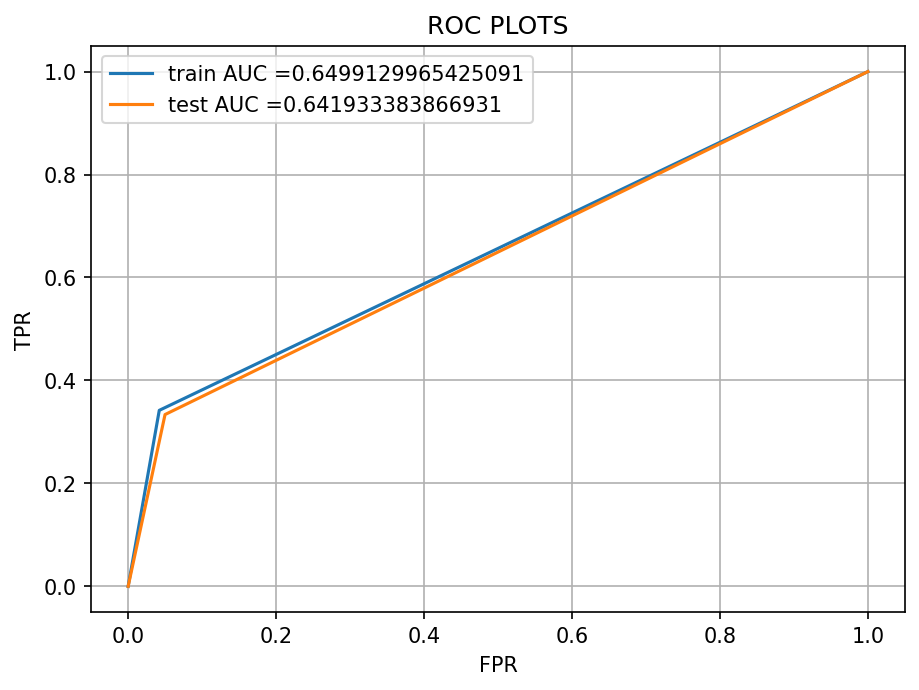

In [67]:
plt.figure(figsize=(7,5),dpi=150)
plt.plot(tr_fpr, tr_tpr, label="train AUC ="+str(auc(tr_fpr, tr_tpr)))
plt.plot(te_fpr, te_tpr, label="test AUC ="+str(auc(te_fpr, te_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

confusion matrix


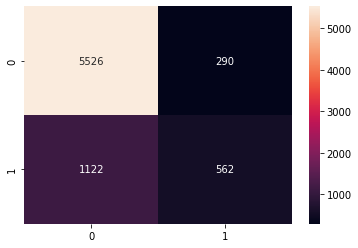

In [68]:
print("confusion matrix")
sns.heatmap(confusion_matrix(y_test, bst.predict(x_test)),annot=True,fmt='d')

In [69]:
accuracy_AdaBoosting=accuracy_score(y_test,y_test_pred)
error_AdaBoosting = 1- accuracy_AdaBoosting
precision_AdaBoosting = precision_score(y_test, y_test_pred, average='binary')
f1_AdaBoosting=f1_score(y_test, y_test_pred)
print(f"Accuracy of AdaBoosting Classifier for this dataset is {accuracy_AdaBoosting}")
print(f"error of AdaBoosting Classifier for this dataset is {error_AdaBoosting}")
print(f"precision of AdaBoosting Classifier for this dataset is {precision_AdaBoosting}")
print(f"F1 score of AdaBoosting Classifier for this dataset is {f1_AdaBoosting}")

Accuracy of AdaBoosting Classifier for this dataset is 0.8117333333333333
error of AdaBoosting Classifier for this dataset is 0.1882666666666667
precision of AdaBoosting Classifier for this dataset is 0.6596244131455399
F1 score of AdaBoosting Classifier for this dataset is 0.4432176656151419
